In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [3]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,16554375,33018.0,11760,8911.377904,59.0,BAT1586599,16.200249,B,G1,MORTGAGE,...,0.040202,1.005686,0,INDIVIDUAL,2,0,50,48379,4599,0
1,16260670,NaN,25543,34092.731820,59.0,BAT1766061,11.592735,B,A4,RENT,...,5.249225,1.134362,0,INDIVIDUAL,24,0,582,211574,20791,0
2,38160762,16774.0,9717,7949.140886,58.0,BAT2803411,10.963143,B,B4,MORTGAGE,...,2.846310,1.554686,0,INDIVIDUAL,82,0,14,313080,25499,0
3,41860561,12977.0,32262,10217.109450,59.0,BAT2575549,11.372651,A,D4,RENT,...,5.314602,1.047915,0,INDIVIDUAL,129,0,42,98679,15270,0
4,14155892,5937.0,22241,13121.033610,59.0,BAT2803411,8.885435,D,A3,RENT,...,4.131232,0.972319,0,INDIVIDUAL,122,0,2036,501316,22000,1


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67563 entries, 0 to 67562
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67563 non-null  int64  
 1   Loan Amount                   66443 non-null  float64
 2   Funded Amount                 67563 non-null  int64  
 3   Funded Amount Investor        67563 non-null  float64
 4   Term                          66683 non-null  float64
 5   Batch Enrolled                67563 non-null  object 
 6   Interest Rate                 67563 non-null  float64
 7   Grade                         67563 non-null  object 
 8   Sub Grade                     67563 non-null  object 
 9   Home Ownership                67563 non-null  object 
 10  Employment Duration           67563 non-null  float64
 11  Verification Status           67563 non-null  object 
 12  Payment Plan                  67563 non-null  object 
 13  L

I will separate the categorical and non-categorical columns in the dataset to distinguish between discrete categories and continuous numerical values.

In [5]:
# Get all categorical columns
categorical_columns = df.select_dtypes(include='object')

# Get all non-categorical columns
non_categorical_columns = df.select_dtypes(exclude='object')

# Get the total number of categorical columns
num_categorical_columns = len(categorical_columns.columns)

# Get the total number of non-categorical columns
num_non_categorical_columns = len(non_categorical_columns.columns)

print("Total Categorical Columns:", num_categorical_columns)
print("Categorical Columns:", categorical_columns.columns.tolist())

print("\nTotal Non-Categorical Columns:", num_non_categorical_columns)
print("Non-Categorical Columns:", non_categorical_columns.columns.tolist())

Total Categorical Columns: 9
Categorical Columns: ['Batch Enrolled', 'Grade', 'Sub Grade', 'Home Ownership', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']

Total Non-Categorical Columns: 26
Non-Categorical Columns: ['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Employment Duration', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']


In [6]:
df.isna().sum()

ID                                 0
Loan Amount                     1120
Funded Amount                      0
Funded Amount Investor             0
Term                             880
Batch Enrolled                     0
Interest Rate                      0
Grade                              0
Sub Grade                          0
Home Ownership                     0
Employment Duration                0
Verification Status                0
Payment Plan                       0
Loan Title                         0
Debit to Income                    0
Delinquency - two years            0
Inquires - six months              0
Open Account                       0
Public Record                      0
Revolving Balance                  0
Revolving Utilities                0
Total Accounts                     0
Initial List Status                0
Total Received Interest            0
Total Received Late Fee            0
Recoveries                         0
Collection Recovery Fee            0
C

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home Ownership                  0
Employment Duration             0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

Checking for duplicate values

In [9]:
df.duplicated().sum()

97

In [10]:
duplicate_rows = df[df.duplicated()]

# If duplicates are found, remove them
if not duplicate_rows.empty:
    df= df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
# Get only the categorical columns
categorical_columns = df.select_dtypes(include='object')

# Use the 'describe()' method for categorical columns
categorical_columns.describe()

,Batch Enrolled,Grade,Sub Grade,Home Ownership,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,65481,65481,65481,65481,65481,65481,65481,65481,65481
unique,41,8,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,3505,18492,4322,35293,32044,65481,29816,35250,65362


In [13]:
for column in categorical_columns.columns:
    unique_values = df[column].unique()
    print(f'Categories in "{column}" are: {unique_values}')
    print(df[column].value_counts())
    print('-' * 100)

Categories in "Batch Enrolled" are: ['BAT1586599' 'BAT2803411' 'BAT2575549' 'BAT5547201' 'BAT4271519'
 'BAT2136391' 'BAT4722912' 'BAT5924421' 'BAT3193689' 'BAT3873588'
 'BAT2428731' 'BAT4694572' 'BAT224923' 'BAT1184694' 'BAT2252229'
 'BAT2522922' 'BAT5629144' 'BAT4136152' 'BAT2558388' 'BAT5714674'
 'BAT5525466' 'BAT5811547' 'BAT2078974' 'BAT1780517' 'BAT1930365'
 'BAT3461431' 'BAT2833642' 'BAT1766061' 'BAT1761981' 'BAT1104812'
 'BAT1135695' 'BAT5489674' 'BAT5341619' 'BAT3865626' 'BAT4808022'
 'BAT2333412' 'BAT2003848' 'BAT5849876' 'BAT4351734' 'BAT3726927'
 'BAT1467036']
BAT3873588    3505
BAT1586599    3050
BAT1104812    2918
BAT2252229    2486
BAT2803411    2361
BAT1780517    2338
BAT1184694    2232
BAT2078974    2221
BAT2575549    2189
BAT4694572    2183
BAT4271519    1998
BAT2558388    1904
BAT3193689    1809
BAT1930365    1797
BAT3726927    1736
BAT2136391    1734
BAT2333412    1724
BAT4136152    1707
BAT5341619    1676
BAT5525466    1666
BAT5489674    1630
BAT5629144    1589
BAT1

In [14]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.548100e+04,65481.000000,65481.000000,65481.000000,65481.000000,65481.000000,65481.000000,65481.000000,65481.000000,65481.000000,...,65481.000000,65481.000000,65481.000000,65481.000000,65481.000000,65481.0,65481.000000,6.548100e+04,65481.000000,65481.000000
mean,2.561855e+07,16843.812343,15766.680823,14625.800036,58.171851,11.846805,80528.234792,23.299997,0.327011,0.145844,...,1.145335,59.566916,1.124005,0.021350,71.225180,0.0,145.768360,1.594864e+05,23127.435791,0.091981
std,2.109122e+07,8363.516157,8147.276463,6781.910657,3.333983,3.718209,44988.251198,8.452738,0.800110,0.473410,...,5.247184,356.362518,3.485667,0.144548,43.319492,0.0,738.652727,1.389690e+05,20901.662685,0.289001
min,1.297933e+06,1020.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.580039e+06,10015.000000,9266.000000,9835.240525,58.000000,9.297779,51713.600600,16.759294,0.000000,0.000000,...,0.021117,1.631552,0.475766,0.000000,35.000000,0.0,24.000000,5.032800e+04,8157.000000,0.000000
50%,1.787407e+07,16071.000000,13037.000000,12795.037850,59.000000,11.381099,69337.863180,22.657265,0.000000,0.000000,...,0.043400,3.345740,0.780546,0.000000,68.000000,0.0,36.000000,1.182810e+05,16737.000000,0.000000
75%,4.271256e+07,22096.000000,21791.000000,17829.640820,59.000000,14.192827,94594.780860,30.047910,0.000000,0.000000,...,0.071898,5.454011,1.069997,0.000000,105.000000,0.0,46.000000,2.282280e+05,32167.000000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [15]:
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home Ownership                  0
Employment Duration             0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

The dataset is now clean. There are no more missing values.

In [16]:
status_percentage = (df['Loan Status'].value_counts() / len(df)) * 100
print(status_percentage)

0    90.801912
1     9.198088
Name: Loan Status, dtype: float64


90.75% of the loan entries are non-defaulted loans (Loan Status = 0), while only 9.25% are defaulted loans (Loan Status = 1).

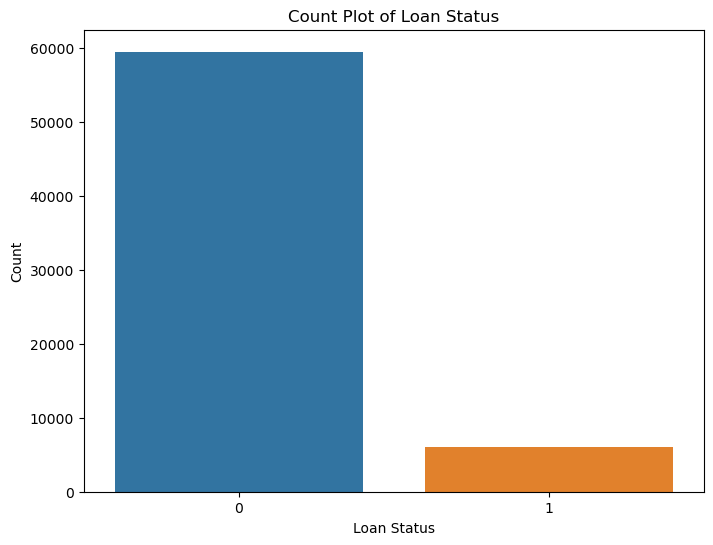

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Loan Status')
plt.title('Count Plot of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

plt.show()

A significant disparity exists in the loan entries.
When compared to loans that have defaulted, the nondefaulted class contributes significantly.

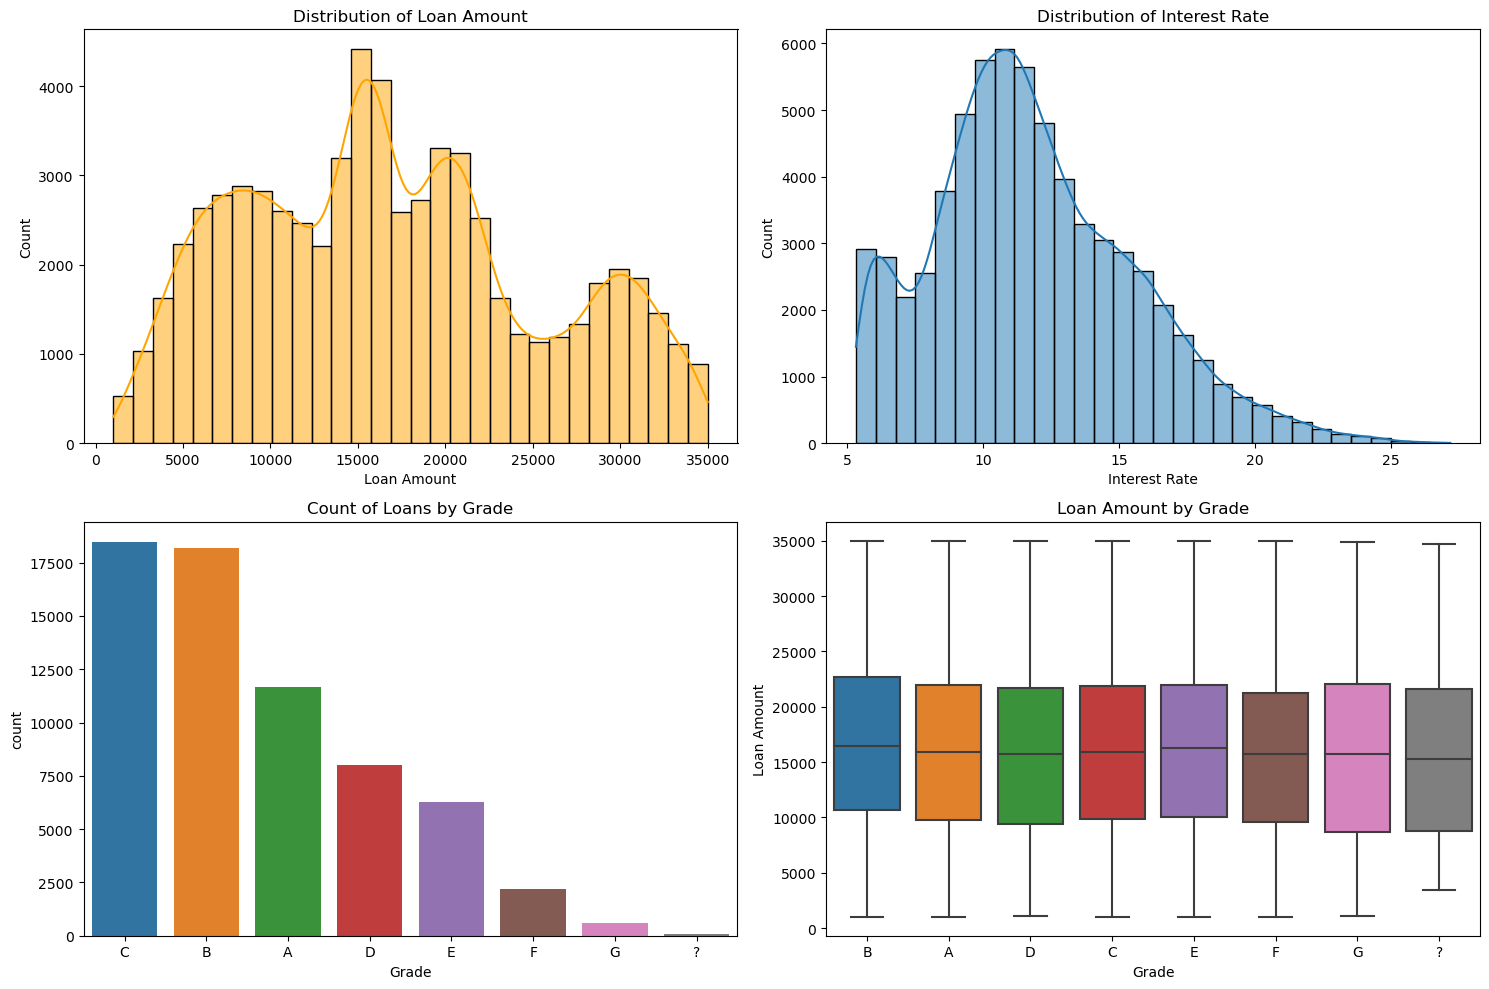

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.548100e+04,65481.000000,65481.000000,65481.000000,65481.000000,65481.000000,65481.000000,65481.000000,65481.000000,65481.000000,...,65481.000000,65481.000000,65481.000000,65481.000000,65481.000000,65481.0,65481.000000,6.548100e+04,65481.000000,65481.000000
mean,2.561855e+07,16843.812343,15766.680823,14625.800036,58.171851,11.846805,80528.234792,23.299997,0.327011,0.145844,...,1.145335,59.566916,1.124005,0.021350,71.225180,0.0,145.768360,1.594864e+05,23127.435791,0.091981
std,2.109122e+07,8363.516157,8147.276463,6781.910657,3.333983,3.718209,44988.251198,8.452738,0.800110,0.473410,...,5.247184,356.362518,3.485667,0.144548,43.319492,0.0,738.652727,1.389690e+05,20901.662685,0.289001
min,1.297933e+06,1020.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.580039e+06,10015.000000,9266.000000,9835.240525,58.000000,9.297779,51713.600600,16.759294,0.000000,0.000000,...,0.021117,1.631552,0.475766,0.000000,35.000000,0.0,24.000000,5.032800e+04,8157.000000,0.000000
50%,1.787407e+07,16071.000000,13037.000000,12795.037850,59.000000,11.381099,69337.863180,22.657265,0.000000,0.000000,...,0.043400,3.345740,0.780546,0.000000,68.000000,0.0,36.000000,1.182810e+05,16737.000000,0.000000
75%,4.271256e+07,22096.000000,21791.000000,17829.640820,59.000000,14.192827,94594.780860,30.047910,0.000000,0.000000,...,0.071898,5.454011,1.069997,0.000000,105.000000,0.0,46.000000,2.282280e+05,32167.000000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [18]:
# Descriptive statistics for numerical columns
desc_stats = df.describe()

# Visualization of the distribution of some key numerical columns
plt.figure(figsize=(15, 10))

# Histogram for "Interest Rate"
plt.subplot(2, 2, 2)
sns.histplot(df['Interest Rate'], kde=True, bins=30)
plt.title('Distribution of Interest Rate')

# Bar plot for "Grade"
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Grade', order=df['Grade'].value_counts().index)
plt.title('Count of Loans by Grade')

# Histogram for "Loan Amount"
plt.subplot(2, 2, 1)
sns.histplot(df['Loan Amount'], color='orange', kde=True, bins=30)
plt.title('Distribution of Loan Amount')

# Box plot for "Loan Amount" by "Grade"
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Grade', y='Loan Amount')
plt.title('Loan Amount by Grade')

plt.tight_layout()
plt.show()

desc_stats

C:\Users\saqla\AppData\Local\Temp\ipykernel_18536\388490115.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


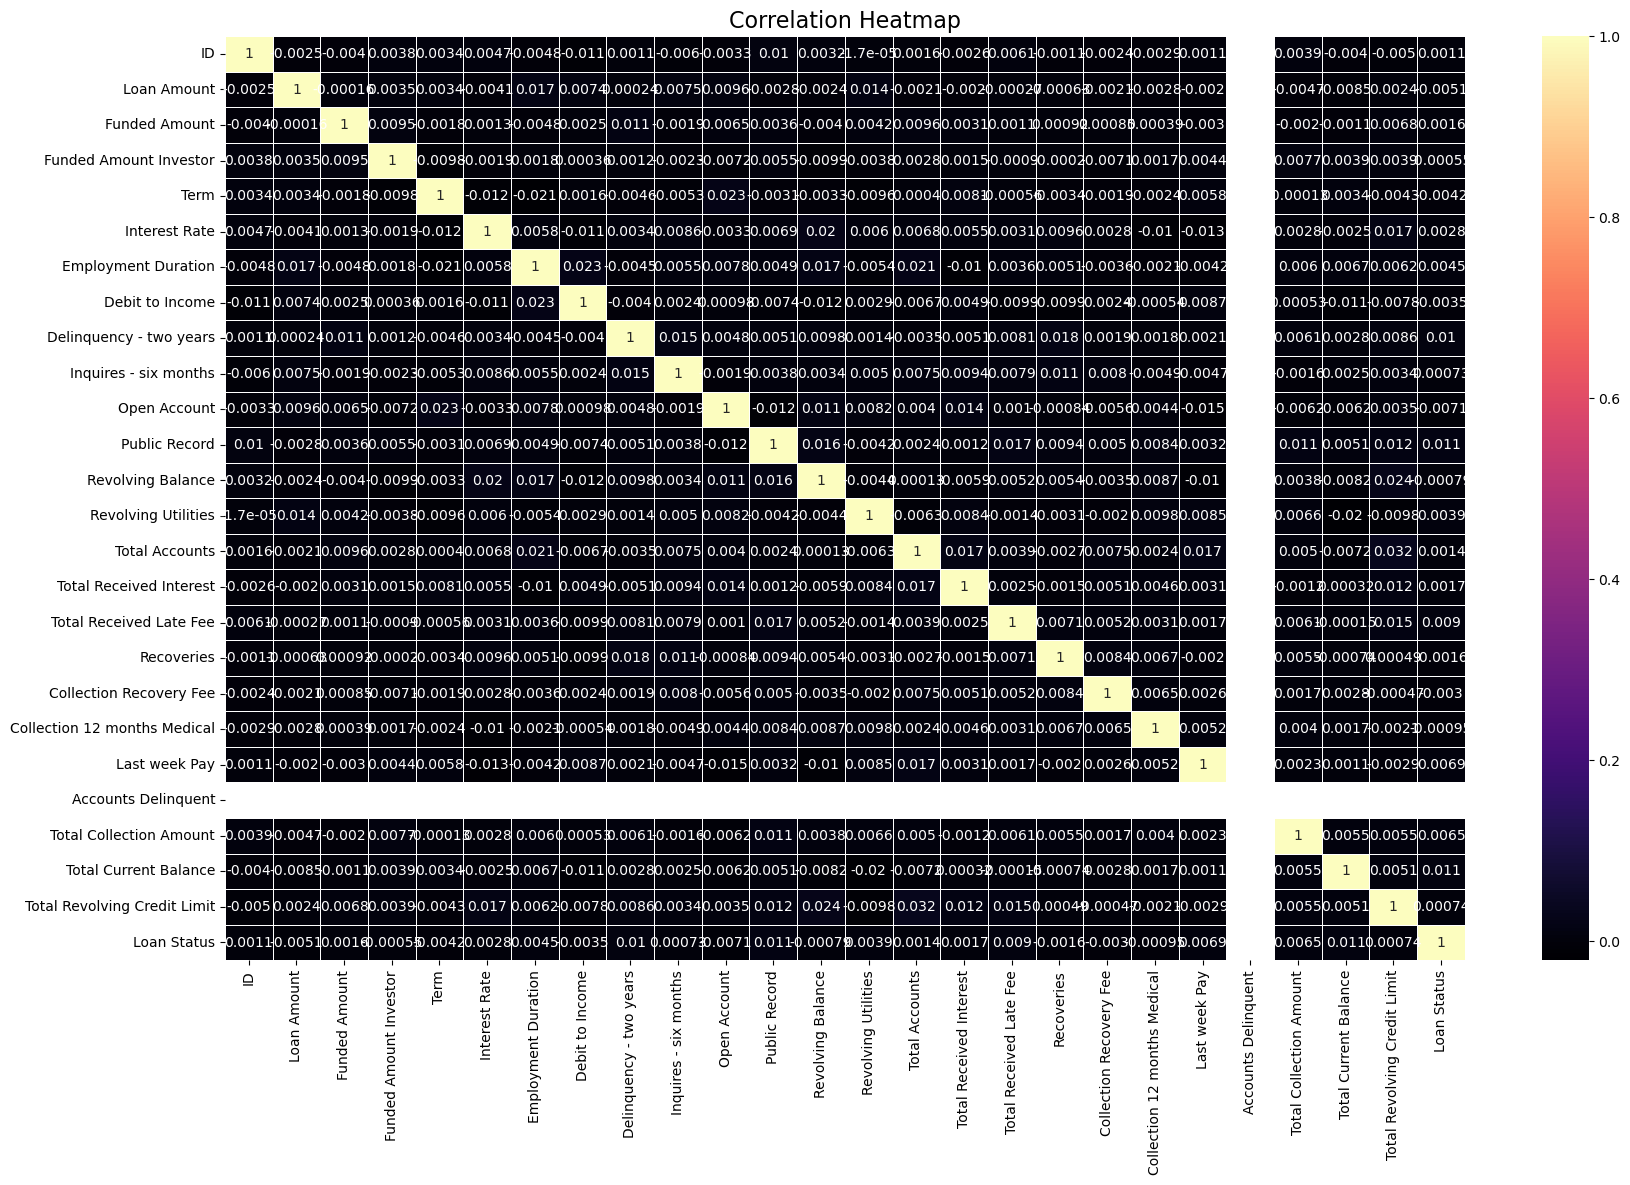

In [19]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Seaborn with a different colormap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

C:\Users\saqla\AppData\Local\Temp\ipykernel_18536\1811730844.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.drop('Loan Status', axis=1).corrwith(df['Loan Status'])


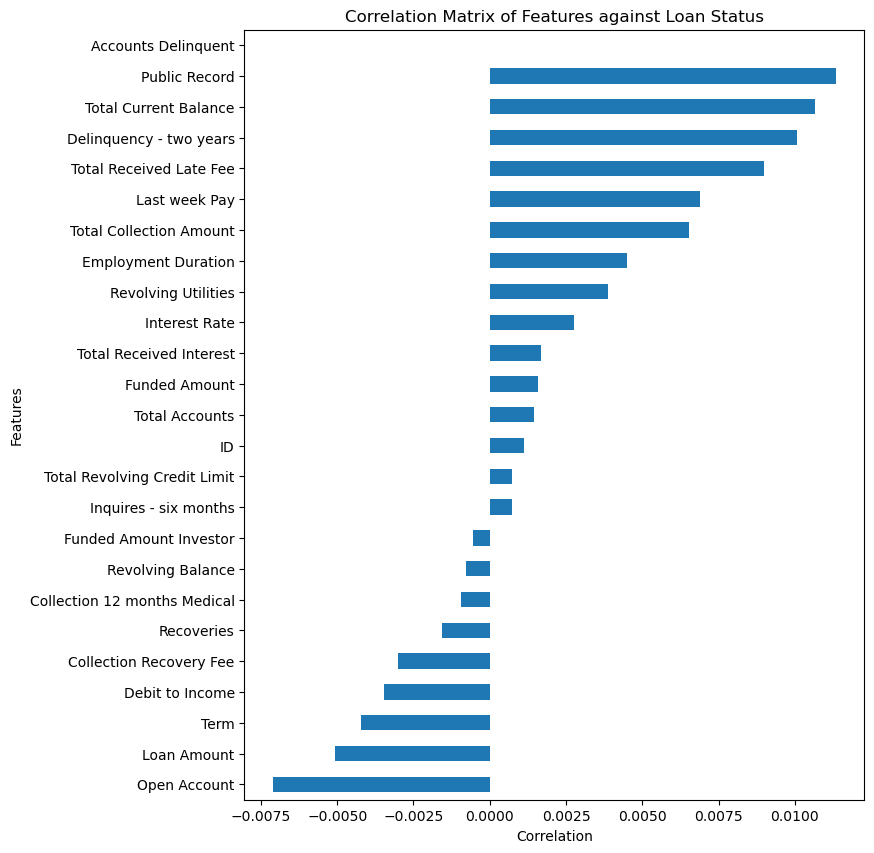

In [20]:
correlations = df.drop('Loan Status', axis=1).corrwith(df['Loan Status'])
# Sort the correlations
sorted_correlations = correlations.sort_values()

# Create the figure and plot
plt.figure(figsize=(8, 10))
sorted_correlations.plot(kind='barh')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation Matrix of Features against Loan Status')

# Display the plot
plt.show()

The relationship between loan status and other variables is not as strong.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65481 entries, 0 to 67562
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            65481 non-null  int64  
 1   Loan Amount                   65481 non-null  float64
 2   Funded Amount                 65481 non-null  int64  
 3   Funded Amount Investor        65481 non-null  float64
 4   Term                          65481 non-null  float64
 5   Batch Enrolled                65481 non-null  object 
 6   Interest Rate                 65481 non-null  float64
 7   Grade                         65481 non-null  object 
 8   Sub Grade                     65481 non-null  object 
 9   Home Ownership                65481 non-null  object 
 10  Employment Duration           65481 non-null  float64
 11  Verification Status           65481 non-null  object 
 12  Payment Plan                  65481 non-null  object 
 13  L

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns to numeric labels
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the DataFrame with label-encoded categorical columns
print(df)

             ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0      16554375      33018.0          11760             8911.377904  59.0   
2      38160762      16774.0           9717             7949.140886  58.0   
3      41860561      12977.0          32262            10217.109450  59.0   
4      14155892       5937.0          22241            13121.033610  59.0   
5       2974291       6007.0          21017            12645.716080  59.0   
...         ...          ...            ...                     ...   ...   
67558  18609984      19034.0           7800             9207.727021  59.0   
67559  61478716      11910.0          21983            10648.403410  58.0   
67560   4860960      21914.0          15981            23044.056430  59.0   
67561  52527924       2962.0          23476            15955.635420  59.0   
67562   4273343      14596.0           6877            11327.561230  59.0   

       Batch Enrolled  Interest Rate  Grade  Sub Grade  Home Ownership  ...

In [23]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,16554375,33018.0,11760,8911.377904,59.0,4,16.200249,2,30,0,...,0.040202,1.005686,0,0,2,0,50,48379,4599,0
2,38160762,16774.0,9717,7949.140886,58.0,19,10.963143,2,8,0,...,2.846310,1.554686,0,0,82,0,14,313080,25499,0
3,41860561,12977.0,32262,10217.109450,59.0,18,11.372651,1,18,2,...,5.314602,1.047915,0,0,129,0,42,98679,15270,0
4,14155892,5937.0,22241,13121.033610,59.0,19,8.885435,4,2,2,...,4.131232,0.972319,0,0,122,0,2036,501316,22000,1
5,2974291,6007.0,21017,12645.716080,59.0,35,19.319776,3,13,2,...,0.996211,0.334443,0,0,0,0,30,92068,16239,1


In [24]:
from sklearn.model_selection import  train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score

In [25]:
X = df.drop('Loan Status',axis=1)
y = df['Loan Status']

In [26]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
smote.fit(X,y)
X,y=smote.fit_resample(X,y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
def feature_imp(df, model):
    ftr_imp = pd.DataFrame()  # Create an empty DataFrame
    ftr_imp["feature"] = df.columns  # Assign column names of the input DataFrame to "feature" column
    ftr_imp["importance"] = model.feature_importances_  # Assign feature importances from the model to "importance" column
    return ftr_imp.sort_values(by="importance", ascending=true)  # Sort the DataFrame by "importance" column in Ascending order

## Random Forest Classifier 

Classification report:
               precision    recall  f1-score   support

           0      0.875     0.964     0.917     11892
           1      0.960     0.862     0.908     11892

    accuracy                          0.913     23784
   macro avg      0.917     0.913     0.913     23784
weighted avg      0.917     0.913     0.913     23784

Confusion Matrix:
 [[11460   432]
 [ 1643 10249]]


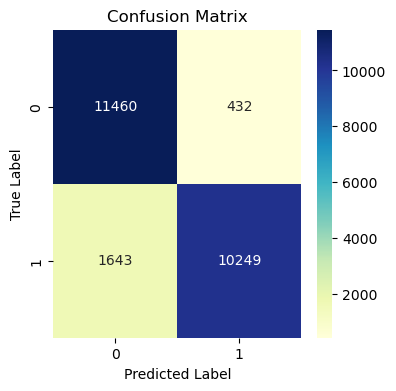

In [31]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set a fixed random seed
np.random.seed(42)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate classification report
report_rf = classification_report(y_test, y_pred_rf, digits=3)
print("Classification report:\n", report_rf)

# Generate confusion matrix
cmf_mtx_rf = confusion_matrix(y_test, y_pred_rf)

# Print confusion matrix
print("Confusion Matrix:\n", cmf_mtx_rf)

plt.figure(figsize=(4, 4))  # Set the figure size to your desired dimensions
sns.heatmap(cmf_mtx_rf, annot=True, cmap="YlGnBu", fmt='d')  # Use 'd' instead of 'g' to display integer values
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Observation
The model's predictions are summarized in the confusion matrix. It demonstrates that 10,247 default cases (true positives) and 11,449 non-default instances (true negatives) were accurately predicted by the model. Additionally, it incorrectly identified 1,645 default instances as non-default and 443 non-default instances as default (false positives and false negatives).

## XG Boost 

Classification report:
               precision    recall  f1-score   support

           0      0.855     0.935     0.893     11892
           1      0.928     0.842     0.883     11892

    accuracy                          0.888     23784
   macro avg      0.892     0.888     0.888     23784
weighted avg      0.892     0.888     0.888     23784

Confusion Matrix:
 [[11114   778]
 [ 1881 10011]]


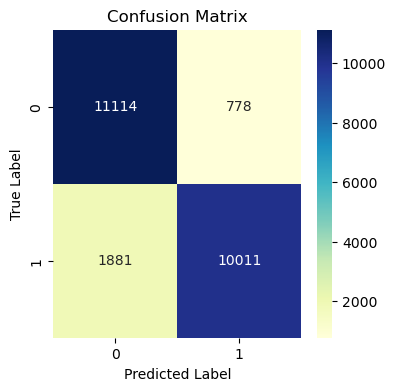

In [32]:
!pip install xgboost
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set a fixed random seed
np.random.seed(42)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate classification report
report_xgb = classification_report(y_test, y_pred_xgb, digits=3)
print("Classification report:\n", report_xgb)

# Generate confusion matrix
cmf_mtx_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print confusion matrix
print("Confusion Matrix:\n", cmf_mtx_xgb)

plt.figure(figsize=(4, 4))  # Set the figure size to your desired dimensions
sns.heatmap(cmf_mtx_xgb, annot=True, cmap="YlGnBu", fmt='d')  # Use 'd' instead of 'g' to display integer values
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Observations
The model's predictions are summarized in the confusion matrix. It demonstrates that 9,988 default cases (true positives) and 11,184 non-default instances (true negatives) were accurately predicted by the model. Additionally, it incorrectly identified 1,904 default instances as non-default and 708 non-default instances as default (false positives and false negatives).